In [1]:
# import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import time
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import itertools
import joblib

In [2]:
# load the data
data = pd.read_csv('data.csv')

In [3]:
# load the data
new_df = pd.read_csv('new_df.csv')

In [4]:
# load the data
df_test_over = pd.read_csv('df_test_over.csv')

In [5]:
# function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
# Define X and Y
X = data.drop('Class', axis=1)
y = data['Class']

In [7]:
# This will be the original training and test dataset for predicting the final model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# XGB undersample model loaded
model_under = joblib.load('model_under.joblib')

In [9]:
# XGB oversample model loaded
model_over = joblib.load('model_over.joblib')

In [10]:
# LR oversample model loaded
lr_over = joblib.load('lr_over.joblib')

In [11]:
# LR undersample model loaded
lr_under = joblib.load('lr_under.joblib')

In [12]:
print("\n========= Without Over and Under Sampling Data Accuracy using XGBClassifier ==============\n")

y_pred = model_under.predict(X_test)
print("Accuracy Score ",accuracy_score(y_pred,y_test))
print ("\n =====Confusion Matrix ======\n")


========= Without Over and Under Sampling Data Accuracy using XGBClassifier ==============

Accuracy Score  0.9583406481513992

 =====Confusion Matrix ======



Confusion matrix
[[54509     1]
 [ 2372    80]]
Confusion matrix
[[56881     0]
 [    0    81]]


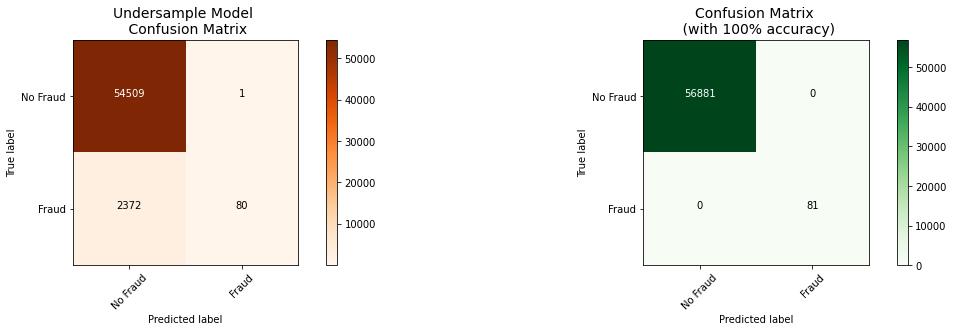

In [13]:
# plot the confusion matrix
xgb_cm_um = confusion_matrix(y_pred,y_test)
actual_cm = confusion_matrix(y_test, y_test)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(xgb_cm_um, labels, title="Undersample Model \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### The XGB Undersample Model shows that it has some difficulties classifying fraud and non-fraud transactions because it could not predict 2300 data points properly.

In [14]:
print("\n========= Without Over and Under Sampling Data Accuracy using Logistic Regression ==============\n")

y_pred = lr_under.predict(X_test)

lr_under.score(X_test,y_test)

print("Accuracy Score ",accuracy_score(y_pred,y_test))
print ("\n =====Confusion Matrix ======\n")


========= Without Over and Under Sampling Data Accuracy using Logistic Regression ==============

Accuracy Score  0.9609739826551034

 =====Confusion Matrix ======



Confusion matrix
[[54667     9]
 [ 2214    72]]
Confusion matrix
[[56881     0]
 [    0    81]]


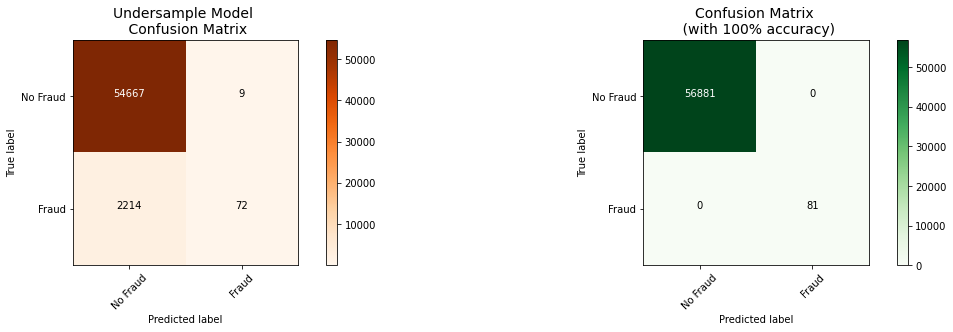

In [15]:
# plot the confusion matrix
lr_cm_um = confusion_matrix(y_pred,y_test)
actual_cm = confusion_matrix(y_test, y_test)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(lr_cm_um, labels, title="Undersample Model \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### The LR Undersample Model shows that it has some difficulties classifying fraud and non-fraud transactions because it could not predict 2200 data points properly.

In [16]:


print("\n========= Without Over and Under Sampling Data Accuracy using XGBClassifier ==============\n")

y_pred = model_over.predict(X_test)
print("Accuracy Score ",accuracy_score(y_pred,y_test))
print ("\n =====Confusion Matrix ======\n")


========= Without Over and Under Sampling Data Accuracy using XGBClassifier ==============

Accuracy Score  1.0

 =====Confusion Matrix ======



Confusion matrix
[[56881     0]
 [    0    81]]
Confusion matrix
[[56881     0]
 [    0    81]]


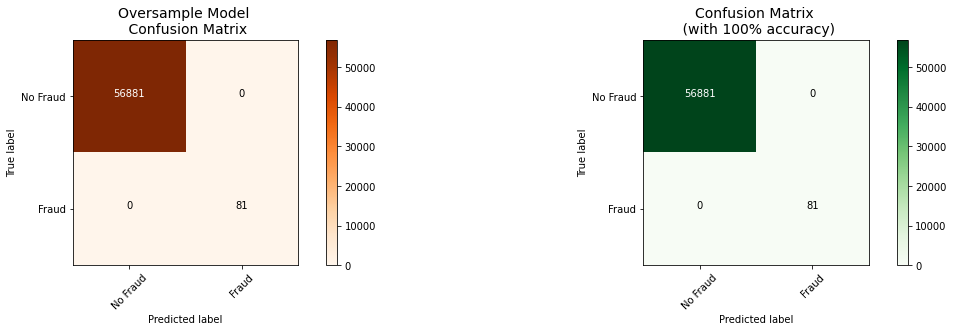

In [17]:
# plot the confusion matrix
xgb_cm_om = confusion_matrix(y_pred,y_test)
actual_cm = confusion_matrix(y_test, y_test)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(xgb_cm_om, labels, title="Oversample Model \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### The XGB Oversample Model shows that it perfectly classifies the imbalanced dataset. 

In [18]:
print("\n========= Without Over and Under Sampling Data Accuracyv using Logistic Regression ==============\n")


y_pred = lr_over.predict(X_test)

lr_over.score(X_test,y_test)

print("Accuracy Score ",accuracy_score(y_pred,y_test))
print ("\n =====Confusion Matrix ======\n")


========= Without Over and Under Sampling Data Accuracyv using Logistic Regression ==============

Accuracy Score  0.9774411010849338

 =====Confusion Matrix ======



Confusion matrix
[[55606    10]
 [ 1275    71]]
Confusion matrix
[[56881     0]
 [    0    81]]


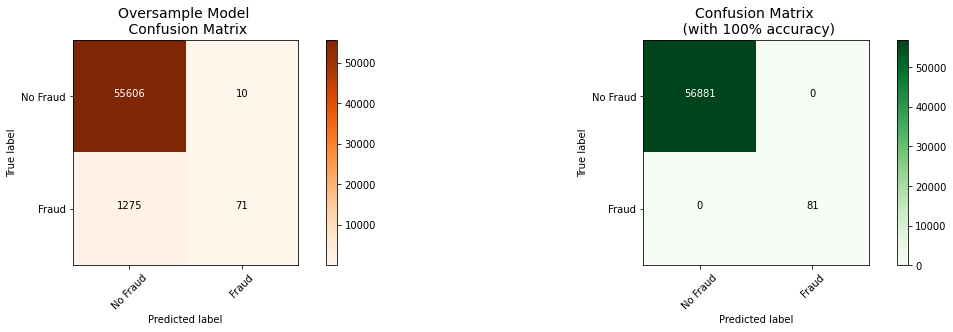

In [19]:
# plot the confusion matrix
lr_cm_om = confusion_matrix(y_pred,y_test)
actual_cm = confusion_matrix(y_test, y_test)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(lr_cm_om, labels, title="Oversample Model \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### The LR Oversample model shows good results with 0.977 accuracy score but could not classify 1300 points properly.